<a href="https://colab.research.google.com/github/Ashutosh621/Taxi_Fare_Prediction/blob/main/FarePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessory library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Ashutosh621/Dataset/main/Taxi_Fare.csv')

# Displaying the shape of the data.

In [3]:
df.shape

(50000, 8)

# Displaying the first five value in head.

In [4]:
df.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


# Checking the data type.

In [5]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

# Describing the statistical data.

In [6]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


# Checking for the NULL values in data set.

In [7]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

# Ploting the Fare price.

Text(0.5, 1.0, 'Distribution of Fare')

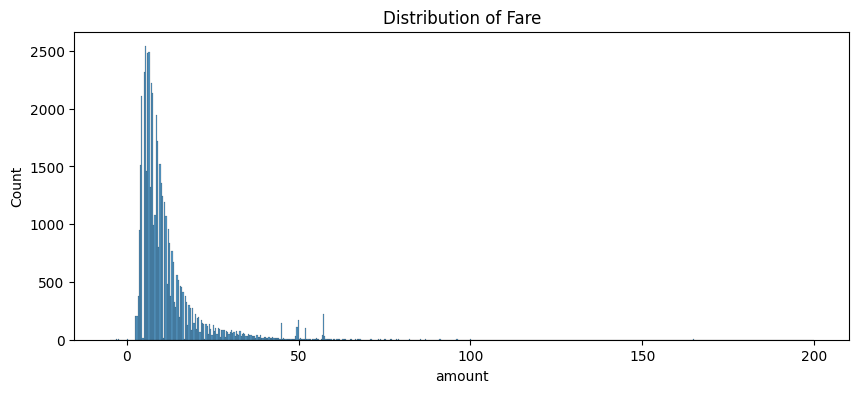

In [8]:
plt.figure(figsize = (10, 4))
sns.histplot(df['amount'])
plt.title('Distribution of Fare')

# Display the Outliers in the amount data set.

In [9]:
print(f"There are {len(df[df['amount'] < 0])} negative fares.")
print(f"There are {len(df[df['amount'] == 0])} $0 fares.")
print(f"There are {len(df[df['amount'] > 100])} fares greater than $100.")

There are 6 negative fares.
There are 3 $0 fares.
There are 16 fares greater than $100.


# Remove Outliers from amount by taking left most value as 2.5 and right most value as 100.
# This appears to be the minimum fare, so any values in the training set less than this amount must be errors in data collection or entry.

In [10]:
df = df[df['amount'].between(left = 2.5, right = 100)]

# Display new shape of data.

In [11]:
df.shape

(49974, 8)

# Ploting the no_of_passenger in form of bar plot.

Text(0, 0.5, 'Count')

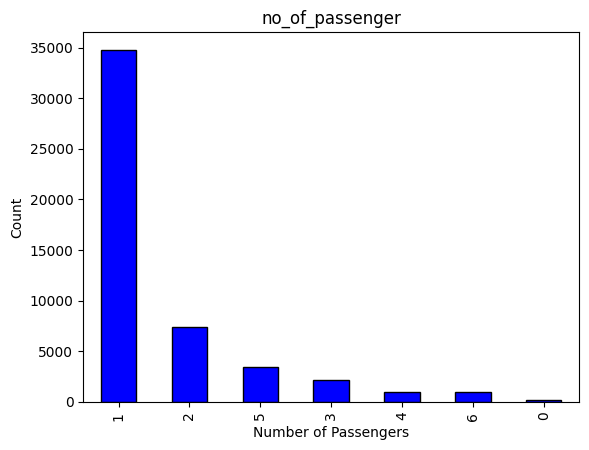

In [12]:
df['no_of_passenger'].value_counts().plot.bar(color = 'b', edgecolor = 'k')
plt.title('no_of_passenger')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')

# we'll remove any passenger counts greater than 6.

In [13]:
df = df.loc[df['no_of_passenger'] < 6]

# Displaying shape of data.

In [14]:
df.shape

(48985, 8)

# Remove latitude and longtiude outliers

In [15]:
df = df.loc[df['latitude_of_pickup'].between(40, 42)]
df = df.loc[df['longitude_of_pickup'].between(-75, -72)]
df = df.loc[df['latitude_of_dropoff'].between(40, 42)]
df = df.loc[df['longitude_of_dropoff'].between(-75, -72)]

print(f'New number of observations: {df.shape[0]}')

New number of observations: 47953


# Displaying the shape of data

In [16]:
df.shape

(47953, 8)

# Absolute difference in latitude and longitude

In [17]:
df['abs_lat_diff'] = (df['latitude_of_dropoff'] - df['latitude_of_pickup']).abs()
df['abs_lon_diff'] = (df['longitude_of_dropoff'] - df['longitude_of_pickup']).abs()

In [18]:
df.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,abs_lat_diff,abs_lon_diff
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009041,0.002701
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.070701,0.036780
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.010708,0.008504
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.024949,0.004437
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.015754,0.011440


# Displying the Distribution of fair amount.

Text(0.5, 1.0, 'Distribution of Fare Amount')

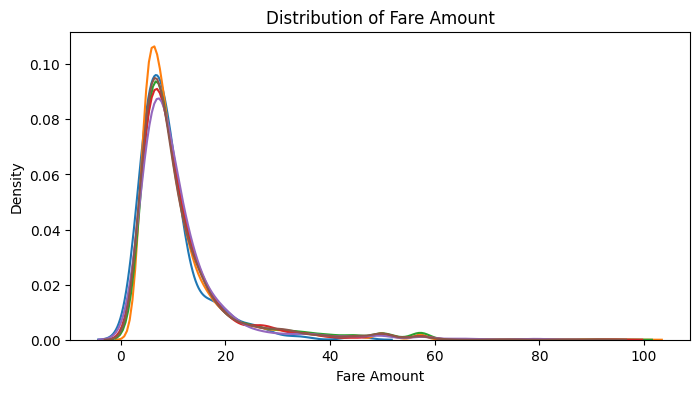

In [19]:
plt.figure(figsize = (8, 4))

for p, grouped in df.groupby('no_of_passenger'):
    sns.kdeplot(grouped['amount'])
    
plt.xlabel('Fare Amount')
plt.ylabel('Density')
plt.title('Distribution of Fare Amount')

In [20]:
df.groupby('no_of_passenger')['amount'].agg(['mean', 'count'])

,mean,count
no_of_passenger,,
0,9.489308,159
1,11.158416,34027
2,11.997327,7251
3,11.243597,2146
4,11.290313,990
5,11.308728,3380


# Bar plot for displaying the Average Fare by Passenger Count.

Text(0.5, 1.0, 'Average Fare by Passenger Count')

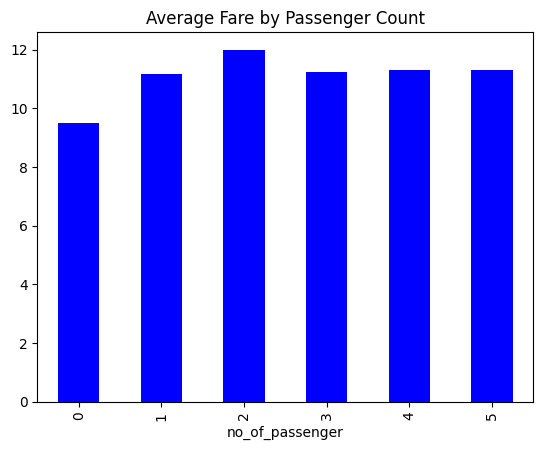

In [21]:
df.groupby('no_of_passenger')['amount'].mean().plot.bar(color = 'b');
plt.title('Average Fare by Passenger Count')


# Displaying data set Correlation with Fare Amount.

<ipython-input-22-79243e0755db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df.corr()


Text(0.5, 1.0, 'Correlation with Fare Amount')

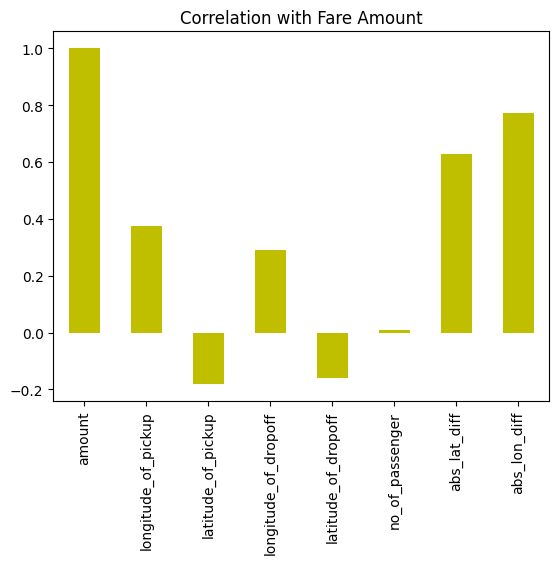

In [22]:
corrs = df.corr()
corrs['amount'].plot.bar(color = 'y');
plt.title('Correlation with Fare Amount')

# Importing the Machine Learning Model called Linear Regression and applying it to our data set.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()


# Spliting the data set for training and testing.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df, np.array(df['amount']),test_size=0.30,random_state=4)

# We'll train the linear regression using three features. The benefit of the linear regression is that it's interpretable: we can inspect the coefficients and intercept.

In [25]:
lr.fit(X_train[['abs_lat_diff', 'abs_lon_diff', 'no_of_passenger']], y_train)

print('Intercept', round(lr.intercept_, 4))
print('abs_lat_diff coef: ', round(lr.coef_[0], 4), 
      '\tabs_lon_diff coef:', round(lr.coef_[1], 4),
      '\tpassenger_count coef:', round(lr.coef_[2], 4))

Intercept 5.2897
abs_lat_diff coef:  104.8324 	abs_lon_diff coef: 163.7634 	passenger_count coef: 0.0031


# Predicting and storing the results.

In [26]:
preds = lr.predict(df[['abs_lat_diff', 'abs_lon_diff', 'no_of_passenger']])

sub = pd.DataFrame({'key':df.unique_id,'fair_amount': preds})

# Display the results.

Text(0.5, 1.0, 'Distribution of Linear Regression Predictions')

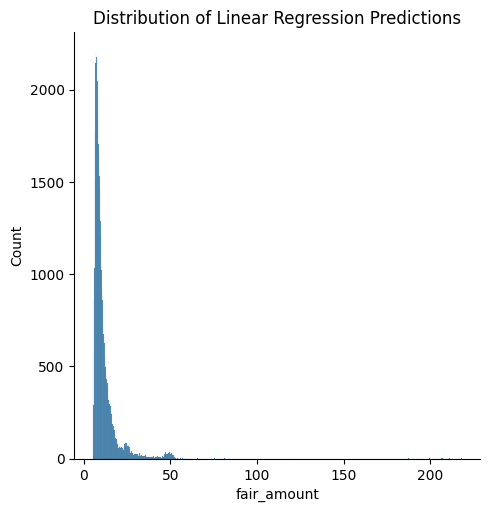

In [27]:
sns.displot(sub['fair_amount'])
plt.title('Distribution of Linear Regression Predictions')

# Comparing our Linear Regression Prediction with the actual data in amount column.

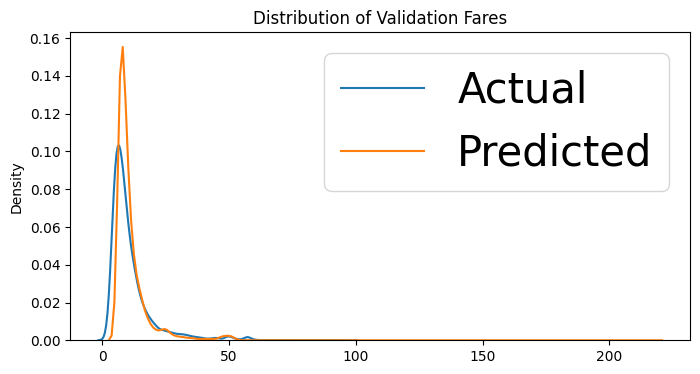

In [28]:
plt.figure(figsize = (8, 4))
sns.kdeplot(y_test, label = 'Actual')
sns.kdeplot(preds, label = 'Predicted')
plt.legend(prop = {'size': 30})
plt.title("Distribution of Validation Fares");

# Importing the Machine Learning Model called Random Forest Regressor and applying it to our data set.

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest

In [30]:
random_forest = RandomForestRegressor(n_estimators = 20, max_depth = 20, 
                                      max_features = None, oob_score = True, 
                                      bootstrap = True, verbose = 1, n_jobs = -1)

# Fiting of the model.

In [31]:
random_forest.fit(X_train[['abs_lat_diff', 'abs_lon_diff', 'no_of_passenger']], y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.4s finished
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(max_depth=20, max_features=None, n_estimators=20,
                      n_jobs=-1, oob_score=True, verbose=1)

# Predicting and storing the result of our model.

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.3s finished


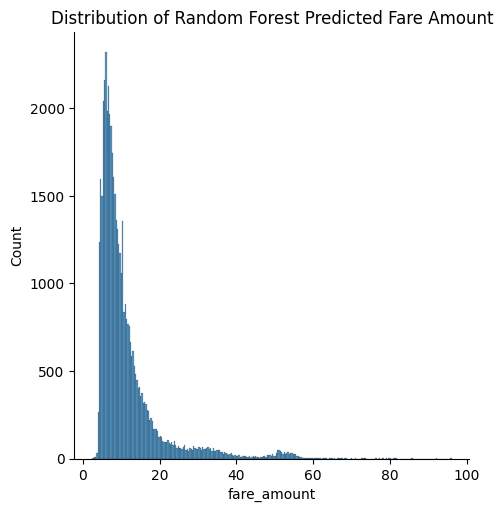

In [32]:
preds = random_forest.predict(df[[ 'abs_lat_diff', 'abs_lon_diff', 'no_of_passenger']])

sub = pd.DataFrame({'key':df.unique_id,'fare_amount': preds})

sns.displot(sub['fare_amount'])
plt.title('Distribution of Random Forest Predicted Fare Amount');

# Comparing our Random Forest Regressor Prediction with the actual data in amount column.

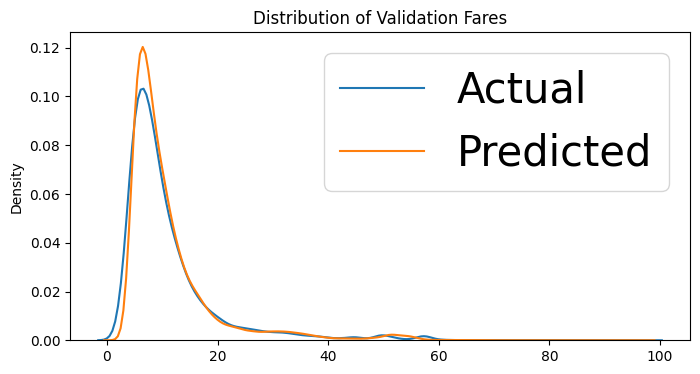

In [33]:
plt.figure(figsize = (8, 4))
sns.kdeplot(y_test, label = 'Actual')
sns.kdeplot(preds, label = 'Predicted')
plt.legend(prop = {'size': 30})
plt.title("Distribution of Validation Fares");

# Analyzing the results we have generated.

In [34]:
analyze = pd.DataFrame({'predicted': preds, 'actual': df.amount})
analyze.describe()

,predicted,actual
count,47953.000000,47953.000000
mean,11.290996,11.296864
std,8.685214,9.359423
min,2.500000,2.500000
25%,6.344156,6.000000
50%,8.544977,8.500000
75%,12.456663,12.500000
max,95.963500,100.000000


# Saving our result into a CSV file.

In [35]:
sub.to_csv('features.csv', index = False)